# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np

In [2]:
def kalman_filter(x, E, verbose=False):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    states = []

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        states.append(x)
        
        if verbose:
            print(f"x= \n{x}")
        print(f"E= \n{E}")

    return np.array(states).squeeze(-1), k_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [3]:
# assume x = [p_x, p_y, v_x, v_y]

dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0., 0., 1000., 1000.])

# next state function: 4D
F = np.array([
    [1., 0., dt, 0.],
    [0., 1., 0., dt],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
])

# measurement function: reflect the fact that we observe x and y but not the two velocities
# z ~ H @ x => H.shape == (2, 4)
H = np.array([
    [1., 0., 0., 0.],
    [0., 1., 0., 0.],
])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1, 0.1])

# 4D identity matrix
I = np.identity(4)

## First experiment

In [4]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [5]:
states_1, k_log_1 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]
E= 
[[0.04544628 0.         0.09089256 0.        ]
 [0.         0.04544628 0.         0.09089256]
 [0.09089256 0.         0.18178513 0.        ]
 [0.         0.09089256 0.         0.18178513]]
E= 
[[0.03955609 0.         0.06592

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [6]:
import matplotlib.pyplot as plt

def plot_states(states):
    p_x, p_y, v_x, v_y = [states[:, i] for i in range(4)]
    
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle('State trajectories over time (dt = 0.1)')
    
    # arrow directions for p
    u_x, u_y = np.r_[p_x[1:]-p_x[:-1], p_x[-1] - p_x[-2]], np.r_[p_y[1:]-p_y[:-1], p_y[-1] - p_y[-2]]
    ax[0].quiver(p_x, p_y, u_x, u_y, scale_units='xy', angles='xy', scale=1)
    ax[0].legend(['position'])
    
    # arrow directions for v
    u_x, u_y = np.r_[v_x[1:]-v_x[:-1], v_x[-1] - v_x[-2]], np.r_[v_y[1:]-v_y[:-1], v_y[-1] - v_y[-2]]
    ax[1].quiver(v_x, v_y, u_x, u_y, scale_units='xy', angles='xy', scale=1)
    ax[1].legend(['velocity'])

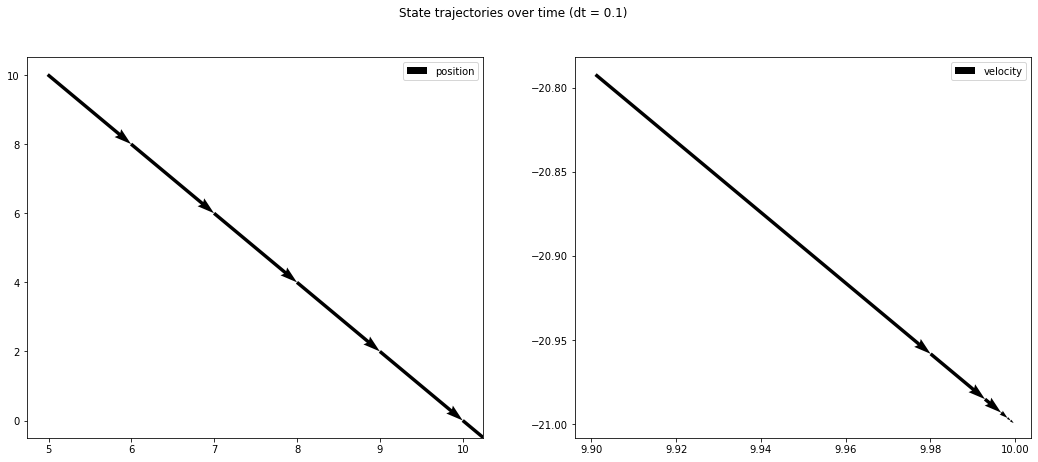

In [7]:
plot_states(states_1)

Visualize the components of the $ K $ matrix below

In [8]:
def plot_k(k_log):
    for k_matrix in k_log:
        col = plt.matshow(k_matrix)
        plt.colorbar(col)
        plt.show()

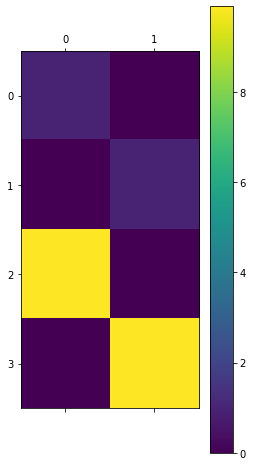

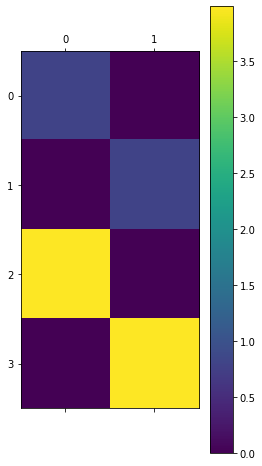

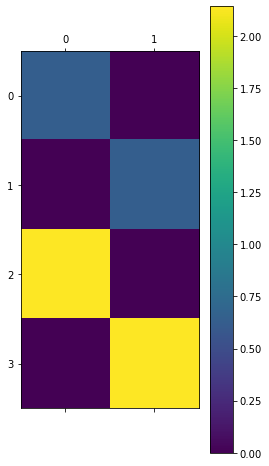

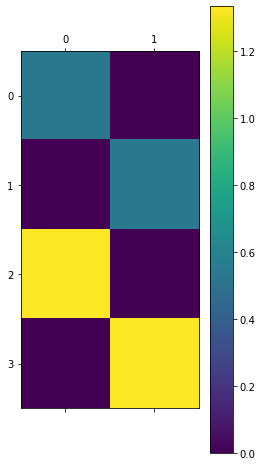

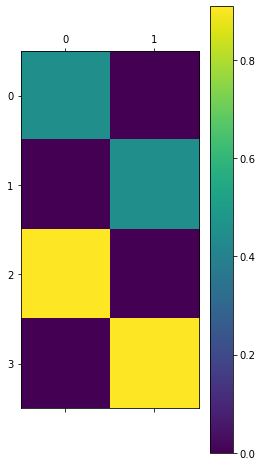

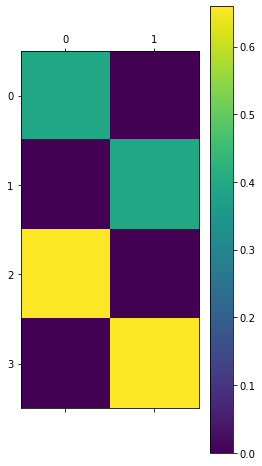

In [9]:
plot_k(k_log_1)

## Second experiment

In [10]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [11]:
states_2, k_log_2 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

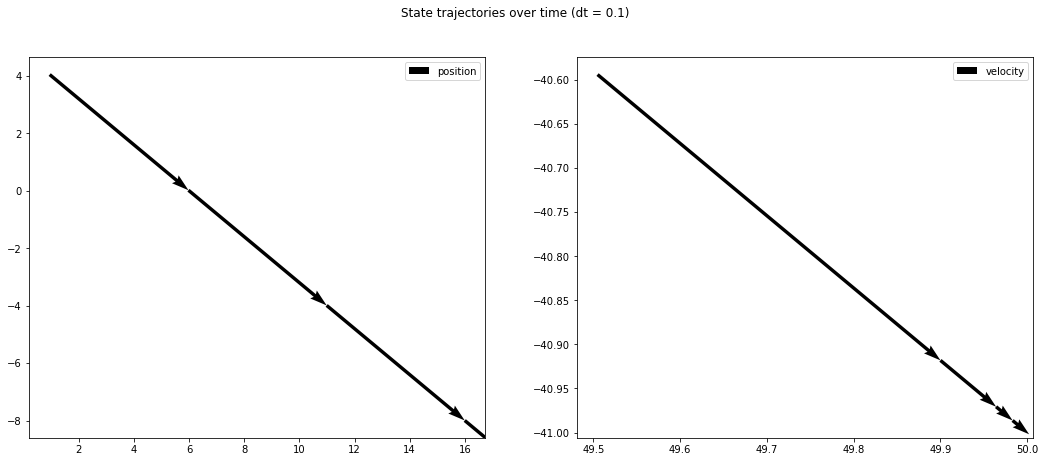

In [12]:
plot_states(states_2)

Visualize the components of the $ K $ matrix below

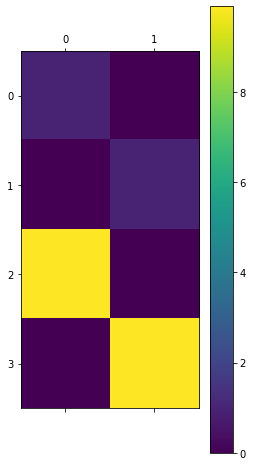

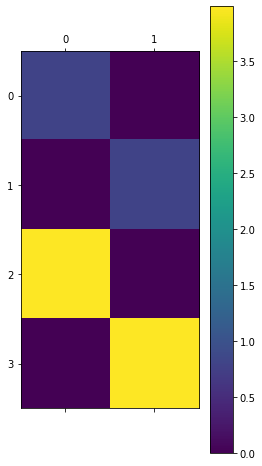

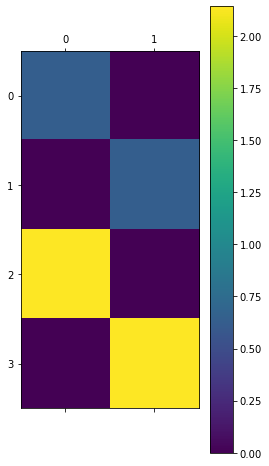

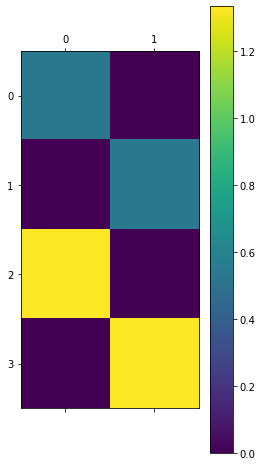

In [13]:
plot_k(k_log_2)

## Third Experiment

In [14]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [15]:
states_3, k_log_3 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

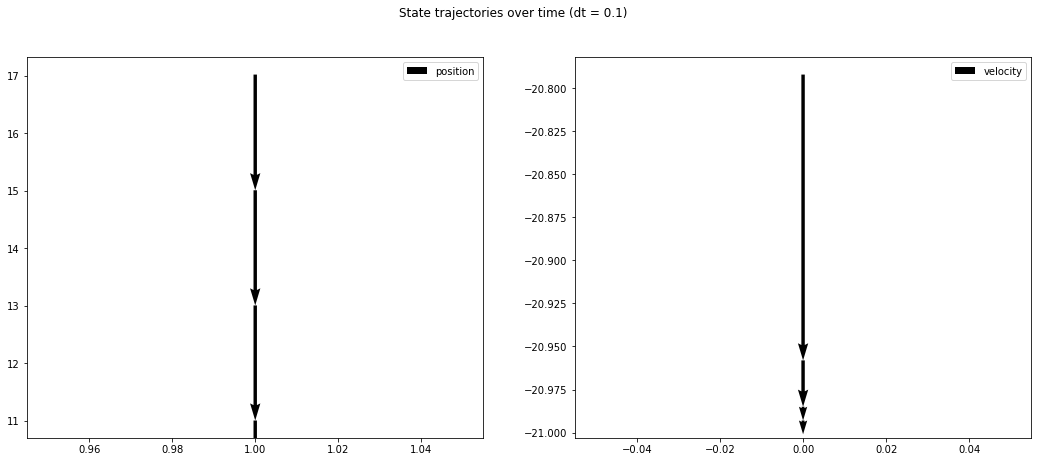

In [16]:
plot_states(states_3)

Visualize the components of the $ K $ matrix below

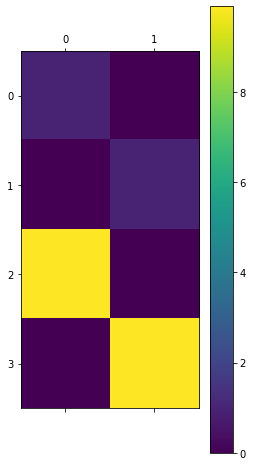

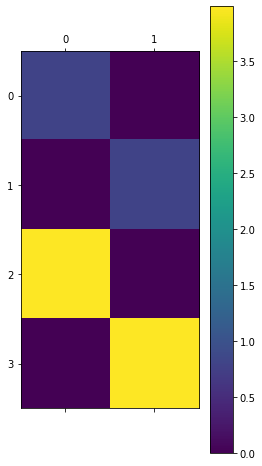

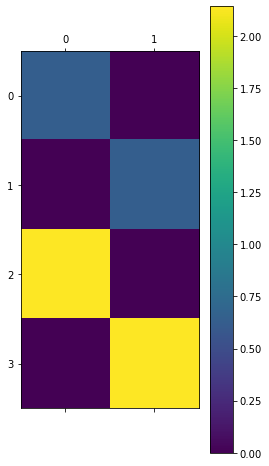

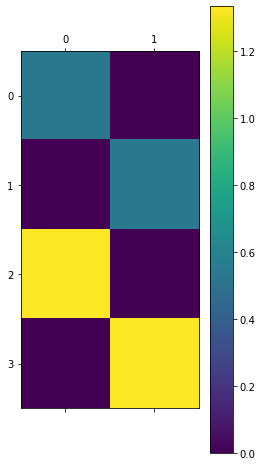

In [17]:
plot_k(k_log_3)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

- The main investigation is about K matrix - it plays a role of factor that accounts on history. The lower norm of K matrix is, the fewer is correction on last observation. In our case K matrix values increase, that means that correction on last observation is greater.

- The variance decreases in time, this might mean that the whole system becomes more determinant, this also may be seen that the velocity changes very slightly at later steps.